# Štatistika o veľkosti vyhorených plôch pri požiari


V tejto štatistickej práci testujem vplyv rôznych parametrov prostredia na veľkosť plôch, ktoré pri požiari vyhoria. Dataset pochádza z archive.ics.uci.edu.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

Ukážka prvých riadkov datasetu:

In [ ]:
data = pd.read_csv("forestfires.csv")
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
burned_areas = data["area"]
temperatures = data["temp"]
wind = data["wind"]
relat_humidity = data["RH"]
rain = data["rain"]

columns = ["temperature", "wind", "relative humidity", "rain"]

In [ ]:
def testing(column):

    X = column # stlpec ktoreho vlpyv budeme testovat
    y = burned_areas # velkosti vyhorenych oblasti pri jednotlivych poziaroch

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # prevedenie t-testu
    t_statistic = model.tvalues[1]
    print(f"T-štatistika: {t_statistic}")
    p_value = model.pvalues[1]
    print(f"P-hodnota: {p_value}")

    alpha = 0.05  # hranica signifikancie
    if p_value < alpha: # zamietneme nulovu hypotezu
        print("Nulovú hypotézu musíme zamietnuť nakoľko parameter má signifikantný efekt.")
    else: # nezamietneme nulovu hypotezu
        print("Nulovú hypotézu zamietnuť nemôžeme nakoľko parameter nemá signifikantný efekt.")

#### Nulová hypotéza

Parameter prostredia (teplota, vietor, relatívna vlhkosť, dážď) nekoreluje s veľkosťou plochy, ktorá pri požiari zhorí.


Hranicu signifikancie vplyvu parametra na vyhorenú plochu som stanovila na 5%. Ak pre testovaný parameter vyjde p-hodnota pod 5%, tak nulovú hypotézu zamietneme. V opačnom prípade nulovú hypotézu nemôžeme zamietnuť.

In [ ]:
print("Analýza vplyvu teploty na veľkosť vyhorenej plochy:")
testing(temperatures)

print("\nAnalýza vplyvu vetra na veľkosť vyhorenej plochy:")
testing(wind)

print("\nAnalýza vplyvu relatívnej vlhkosti na veľkosť vyhorenej plochy:")
testing(relat_humidity)

print("\nAnalýza vplyvu dažďa na veľkosť vyhorenej plochy:")
testing(rain)

Analýza vplyvu teploty na veľkosť vyhorenej plochy:
T-štatistika: 2.231141720701071
P-hodnota: 0.026101460579886132
Nulovú hypotézu musíme zamietnuť nakoľko parameter má signifikantný efekt.

Analýza vplyvu vetra na veľkosť vyhorenej plochy:
T-štatistika: 0.2795447020688836
P-hodnota: 0.7799390703615237
Nulovú hypotézu zamietnuť nemôžeme nakoľko parameter nemá signifikantný efekt.

Analýza vplyvu relatívnej vlhkosti na veľkosť vyhorenej plochy:
T-štatistika: -1.7186968531017115
P-hodnota: 0.08627055153857449
Nulovú hypotézu zamietnuť nemôžeme nakoľko parameter nemá signifikantný efekt.

Analýza vplyvu dažďa na veľkosť vyhorenej plochy:
T-štatistika: -0.16715953280116638
P-hodnota: 0.8673101386270132
Nulovú hypotézu zamietnuť nemôžeme nakoľko parameter nemá signifikantný efekt.


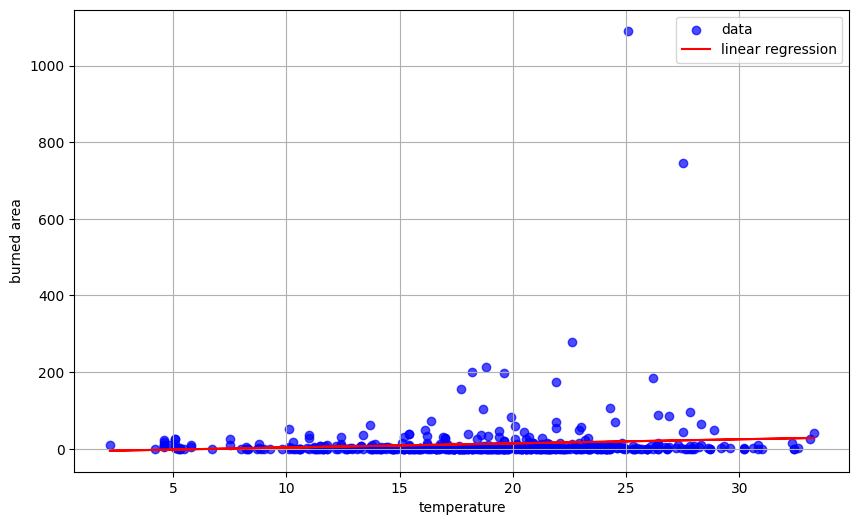

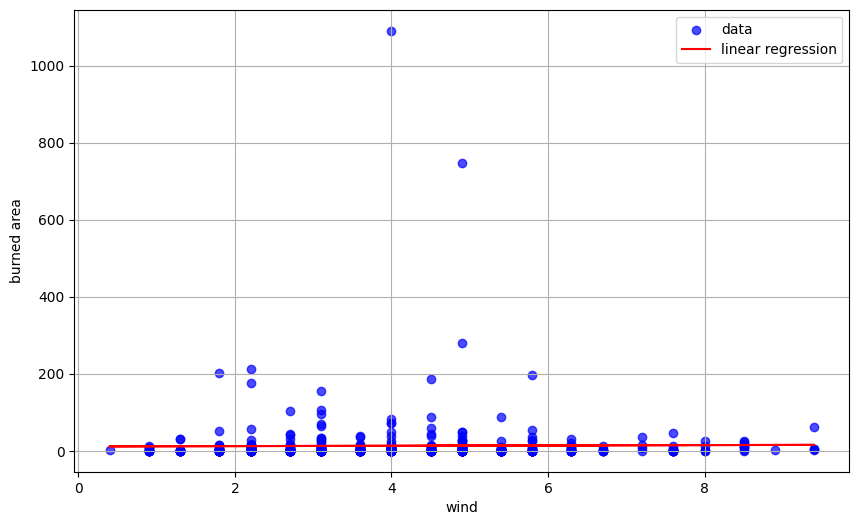

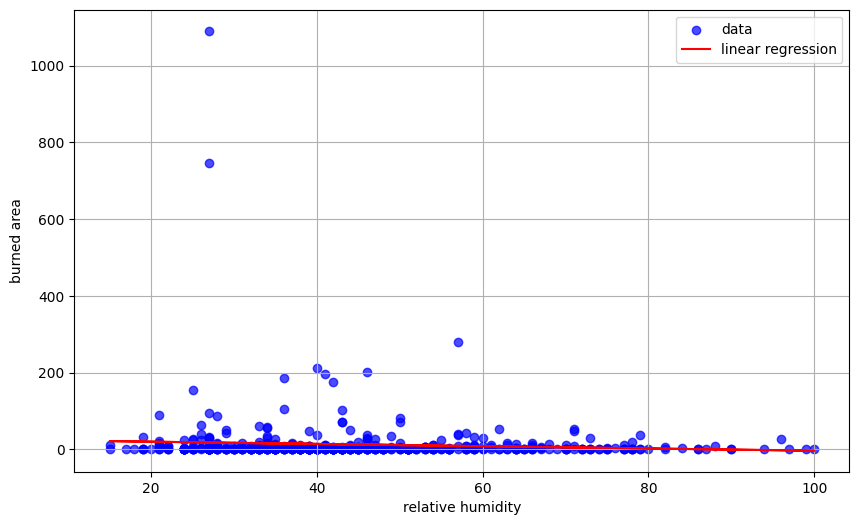

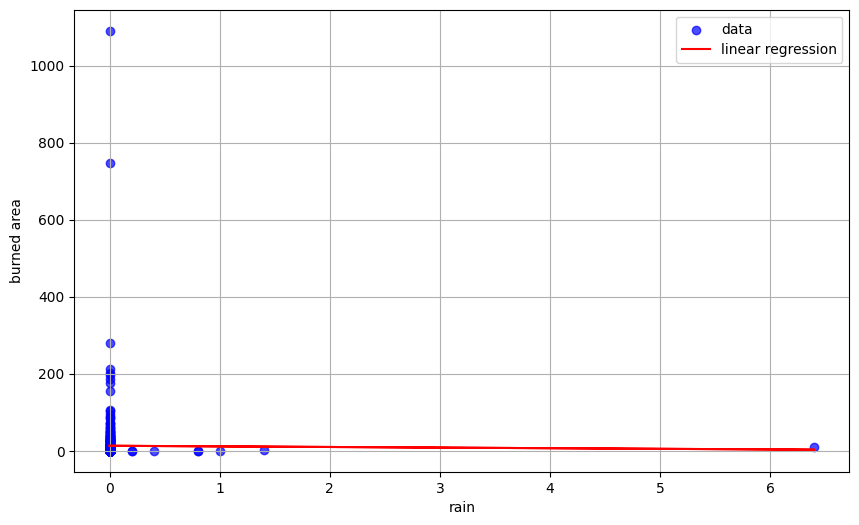

In [ ]:

def graph(column, columns):
    # prisposobenie dat formatu vykreslovaneho grafu
    X_val = column.values.reshape(-1, 1)
    y_val = burned_areas.values

    # model linearnej regresie
    model = LinearRegression()
    model.fit(X_val, y_val)

    # predikcia velkosti zhorenych ploch
    predicted_burned_areas = model.predict(X_val)

    plt.figure(figsize=(10, 6))
    plt.scatter(column, burned_areas, c='blue', alpha=0.7, label='data')
    plt.plot(column, predicted_burned_areas, color='red', label='linear regression')

    plt.xlabel(f"{columns.pop(0)}")
    plt.ylabel("burned area")
    plt.legend()
    plt.grid(True)
    plt.show()

graph(temperatures, columns)
graph(wind, columns)
graph(relat_humidity, columns)
graph(rain, columns)

#### Záver

Z analýzy dát vyplýva, že jedine v prípade teploty môžeme pozorovať pozitívnu koreláciu s veľkosťou vyhorenej plochy. To môžeme pozorovať aj na jednotlivých grafoch.